Mejor generación y cromosomas en binario:
Generación	X (binario)	Y (binario)
----------------------------------------
0		01110000	01110010
1		01100111	01101110
2		01100110	01101101
3		01110010	01110010
4		01110001	01101100
5		01110000	01100010
6		01110001	01110010
7		01110000	01101101
8		01110000	01110001
9		01110001	01101100
10		01110001	01110010
11		01110000	01110010
12		01110001	01110100
13		01110101	01101110
14		01100111	01101110
15		01101010	01101101
16		01110001	01110010
17		01110001	01101101
18		01100111	01110010
19		01110101	01101001
20		01110101	01111001
21		01110001	01110010
22		01110000	01111001
23		01110001	01101101
24		01110001	01110010
25		01111001	01111001
26		01110001	01110100
27		01110000	01111001
28		01110101	01101100
29		01110000	01110010
30		01110000	01101101
31		01110010	01101101
32		01110000	01101101
33		01110100	01110101
34		01110000	01110010
35		01111100	01110010
36		01100110	01111001
37		01110000	01110010
38		01110000	01101101
39		01110001	01101001
40		01110111

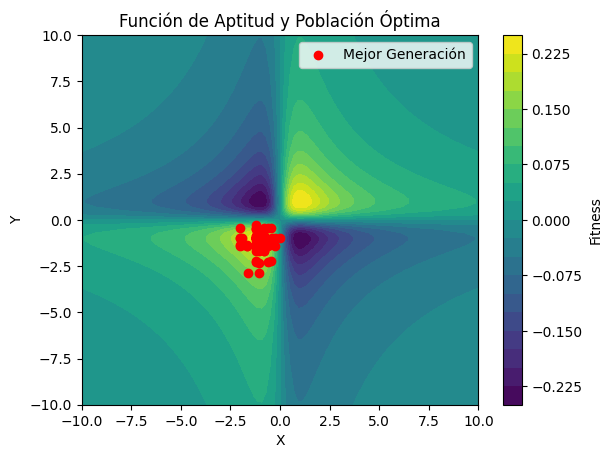

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función a maximizar
def fitness_function(x, y):
    return (x / (1 + x**2)) * (y / (1 + y**2))

# Función para inicializar una población aleatoria
def initialize_population(population_size, x_range=(-10, 10), y_range=(-10, 10)):
    population = []
    for _ in range(population_size):
        x = np.random.uniform(x_range[0], x_range[1])
        y = np.random.uniform(y_range[0], y_range[1])
        population.append((x, y))
    return population

# Función para evaluar la aptitud de la población
def evaluate_population(population):
    fitness_scores = []
    for individual in population:
        x, y = individual
        fitness_scores.append(fitness_function(x, y))
    return np.array(fitness_scores)

# Función para seleccionar individuos basados en la ruleta
def roulette_wheel_selection(population, probabilities):
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return [population[i] for i in selected_indices]

# Función para realizar un cruce entre dos individuos
def crossover(parent1, parent2):
    x1, y1 = parent1
    x2, y2 = parent2
    child1 = (x1, y2)
    child2 = (x2, y1)
    return child1, child2

# Función para aplicar mutación a un individuo
def mutate(individual, mutation_rate=0.1):
    x, y = individual
    if np.random.rand() < mutation_rate:
        x += np.random.uniform(-1, 1)
    if np.random.rand() < mutation_rate:
        y += np.random.uniform(-1, 1)
    return (x, y)

# Función para convertir un número en punto flotante en binario con 8 bits
def float_to_binary(num):
    # Escalamos el número al rango [0, 255] para representarlo en 8 bits
    scaled_num = int((num + 10) * 255 / 20)
    # Convertimos el número a binario con 8 bits
    binary_str = bin(scaled_num)[2:].zfill(8)
    return binary_str

# Parámetros del algoritmo genético
population_size = 100
num_generations = 100
mutation_rate = 0.1

# Inicializar la población
population = initialize_population(population_size)

# Variables para almacenar la mejor generación
best_generation = None
best_fitness_scores = None

# Ciclo de generaciones
for generation in range(num_generations):
    # Calcular la aptitud de la población
    fitness_scores = evaluate_population(population)
    
    # Normalizar las puntuaciones de aptitud
    normalized_fitness = fitness_scores - np.min(fitness_scores)
    total_fitness = np.sum(normalized_fitness)
    probabilities = normalized_fitness / total_fitness

    # Seleccionar nuevos individuos para la próxima generación
    selected_population = roulette_wheel_selection(population, probabilities)
    
    # Crear la población de la próxima generación
    next_generation = []
    while len(next_generation) < population_size:
        parent1 = selected_population[np.random.randint(0, len(selected_population))]
        parent2 = selected_population[np.random.randint(0, len(selected_population))]
        child1, child2 = crossover(parent1, parent2)
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)
        next_generation.append(child1)
        next_generation.append(child2)
    
    population = next_generation

    # Actualizar la mejor generación
    if best_generation is None or np.max(fitness_scores) > np.max(best_fitness_scores):
        best_generation = population.copy()
        best_fitness_scores = fitness_scores.copy()

# Mostrar la mejor generación y el cromosoma en binario
print("Mejor generación y cromosomas en binario:")
print("Generación\tX (binario)\tY (binario)")
print("-" * 40)
for i, individual in enumerate(best_generation):
    x, y = individual
    x_binary = float_to_binary(x)
    y_binary = float_to_binary(y)
    print(f"{i}\t\t{x_binary}\t{y_binary}")

# Crear una función que evalúe la función de aptitud para cada punto en el espacio
def evaluate_fitness_surface():
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = fitness_function(X, Y)
    return X, Y, Z

# Obtener los puntos y valores de la función de aptitud
X, Y, Z = evaluate_fitness_surface()

# Crear la gráfica de contorno
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(label='Fitness')

# Mostrar la mejor generación
best_generation = np.array([(individual[0], individual[1]) for individual in best_generation])
plt.scatter(best_generation[:, 0], best_generation[:, 1], color='red', label='Mejor Generación')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Función de Aptitud y Población Óptima')
plt.legend()
plt.show()
